In [7]:
import numpy as np
import cv2
import  imutils
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import sys
import pytesseract
import pandas as pd
import time

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
image = cv2.imread('62.jpeg')

image = imutils.resize(image, width=500)

cv2.imshow("Original Image", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("1 - Grayscale Conversion", gray)#1

gray = cv2.bilateralFilter(gray, 11, 17, 17)
cv2.imshow("2 - Bilateral Filter", gray)#2

edged = cv2.Canny(gray, 170, 200)
cv2.imshow("4 - Canny Edges", edged)#3
#print("1")
cv2.waitKey(1000)
cv2.destroyAllWindows()#4
#print("2")
(_,cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)#removed new


In [8]:
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30]
NumberPlateCnt = None 

count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:  
            NumberPlateCnt = approx 
            break

In [9]:
mask = np.zeros(gray.shape,np.uint8)

In [10]:
new_image = cv2.drawContours(mask,[NumberPlateCnt],0,255,-1)

In [11]:
new_image = cv2.bitwise_and(image,image,mask=mask)

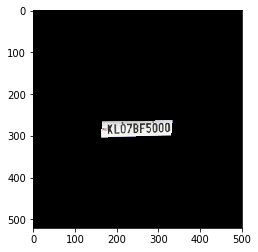

In [12]:
imgplot = plt.imshow(new_image)

In [13]:
config = ('-l eng --oem 1 --psm 3')

In [15]:
text = pytesseract.image_to_string(new_image, config=config)
#print(text)#5

#Data is stored in CSV file
raw_data = {'date':[time.asctime( time.localtime(time.time()))],'':[text]}
   

df = pd.DataFrame(raw_data)
df.to_csv('data.csv',mode='a')

# Print recognized text
print(text)

cv2.waitKey(10)
cv2.destroyAllWindows()

KLO7BF5000
